## Getting The "Optimal" Number Of Clusters: K-Means and Hierarchical Clustering

Please go through this file carefully and REPLACE all instances of the word None with the appropriate commands.

## [A] K-Means

K-means clustering is an unsupervised algorithm. In an unsupervised algorithm, we are not interested in making predictions (since we don’t have a target/output variable). The objective is to discover interesting patterns in the data, e.g., are there any subgroups or 'cluster' in the data.

In this assignment, discuss the most important parameter of K-Means i.e., the ways by which we can select an optimal number of clusters (K).

#### Create an artificial dataset

<Axes: xlabel='X1', ylabel='X2'>

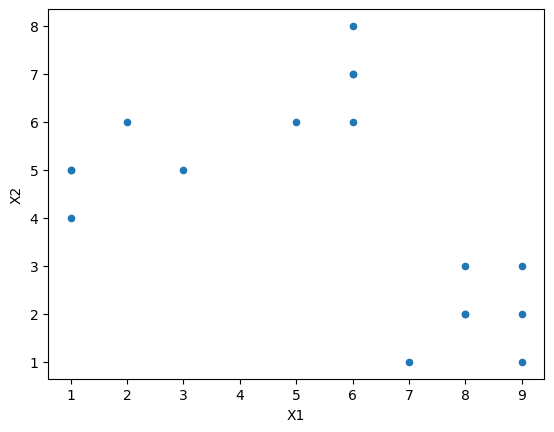

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mlxtend.data import wine_data
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

df = pd.DataFrame({'X1': [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8],
                  'X2': [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]})

# create the scatter plot of the two features (X1 on the x-axis and X2 on the y-axis)
df.plot.scatter('X1', 'X2')

Visually we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer.

### 1. The Elbow Method
The elbow method runs K-means clustering on the dataset for a range of values of K, say 1 to 10.

- Perform K-means clustering with all these different values of K. For each of the K values, we calculate average distances to the centroid across all data points.
- Plot these points and find the point where the average distance from the centroid falls suddenly (“Elbow”).

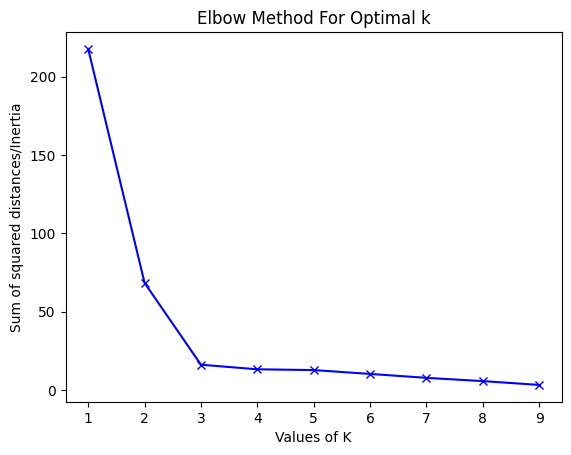

In [2]:
def elbow_method(X):
    Sum_of_squared_distances = []
    K = range(1,10)
    for num_clusters in K:
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(X)
        Sum_of_squared_distances.append(kmeans.inertia_)
    plt.plot(K,Sum_of_squared_distances,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Sum of squared distances/Inertia') 
    plt.title('Elbow Method For Optimal k')
    plt.show()

# In my version we can do it directly without getting the values.
# However for the sake of the exersice we could do something like
X = df.values

# elbow_method(X)
elbow_method(df)

The curve looks like an elbow. In the above plot, the elbow is at K=3, i.e. the sum of squared distances falls suddenly, indicating the optimal K for this dataset is 3.

### 2. Silhouette analysis
The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

- Select a range of values of k (say 1 to 10).
- Plot Silhouette coefﬁcient for each value of K.

The equation for calculating the silhouette coefﬁcient for a particular data point:

$$S(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$$

- S(i) is the silhouette coefficient of the data point i.
- a(i) is the average distance between i and all the other data points in the cluster to which i belongs.
- b(i) is the average distance from i to all clusters to which i does not belong.

We will then calculate the average_silhouette for every K.

$$AverageSilhouette = mean\{S(i)\}$$

Then plot the graph between average_silhouette and K.

Points to remember while calculating silhouette coefficient:

- The value of the silhouette coefﬁcient is between [-1, 1].
- A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
- The worst value is -1. Values near 0 denote overlapping clusters.

Let us see the python code with help of an example.

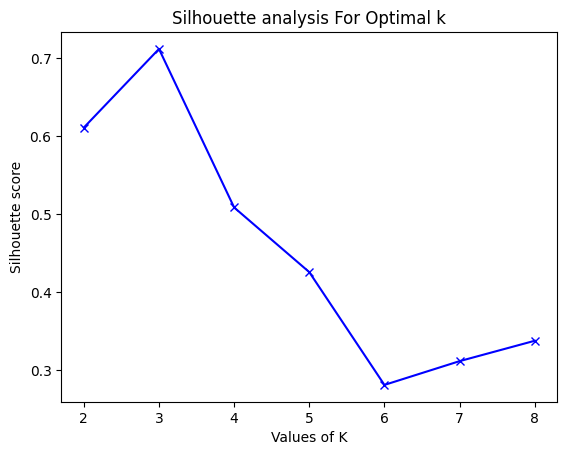

In [3]:
def silhouette(X):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    silhouette_avg = []
    for num_clusters in range_n_clusters:
        # initialise kmeans
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        kmeans.fit(X)
        cluster_labels = kmeans.labels_
        # silhouette score
        silhouette_avg.append(silhouette_score(X, cluster_labels))

    plt.plot(range_n_clusters,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()

# The diagram differs from the one provided as the random_state was not provided
# For the sake of reproducability I am adding it here
silhouette(df)

We see that the silhouette score is maximized at k = 3. So, we will take 3 clusters.

NOTE: The silhouette Method is used in combination with the Elbow Method for a more confident decision.

### [B] Hierarchical Clustering

In K-means clustering, the number of clusters that you want to divide your data points into i.e., the value of K has to be pre-determined whereas in Hierarchical clustering data is automatically formed into a tree shape form (dendrogram).

So how do we decide which clustering to select? We choose either of them depending on our problem statement and business requirement.

Hierarchical clustering gives you a deep insight into each step of converging different clusters and creates a dendrogram. It helps you to figure out which cluster combination makes more sense.

There are mainly two types of hierarchical clustering:

- Agglomerative clustering: It’s also known as AGNES (Agglomerative Nesting). It works in a bottom-up manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root). The result is a tree which can be plotted as a dendrogram.
- Divisive hierarchical clustering: It’s also known as DIANA (Divise Analysis) and it works in a top-down manner. The algorithm is an inverse order of AGNES. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster.

Note that agglomerative clustering is good at identifying small clusters. Divisive hierarchical clustering is good at identifying large clusters.

#### Agglomerative Hierarchical Clustering

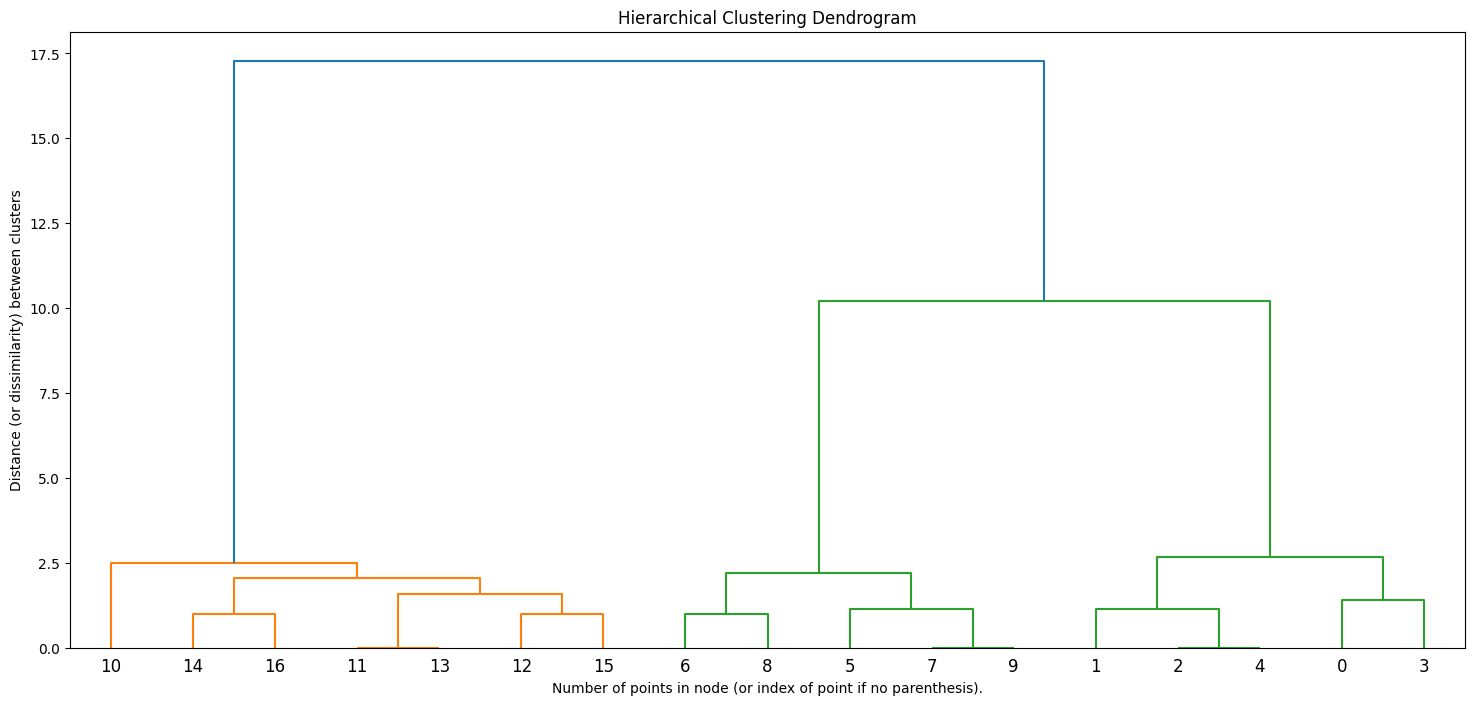

In [4]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def hierarchical_clustering(X):
    # setting distance_threshold=0 ensures we compute the full tree.
    anglomer_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

    anglomer_model = anglomer_model.fit(X)
    plt.figure(figsize=(18, 8))
    plt.title("Hierarchical Clustering Dendrogram")
    # plot the dendrogram
    plot_dendrogram(anglomer_model)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel("Distance (or dissimilarity) between clusters")
    
    plt.show()
    
# run hierarchical_clustering function
hierarchical_clustering(df)

##### Working with Dendrograms
In the dendrogram displayed above, each leaf corresponds to one observation. As we move up the tree, observations that are similar to each other are combined into branches, which are themselves fused at a higher height.

The height of the fusion (vertical line), provided on the vertical axis, indicates the (dis)similarity between two observations. The higher the height of the fusion, the less similar the observations are. Note that, conclusions about the proximity of two observations can be drawn only based on the height where branches containing those two observations first are fused. We cannot use the proximity of two observations along the horizontal axis as a criteria of their similarity.

The height of the cut (horizontal line --> threshold) to the dendrogram controls the number of clusters obtained. There is no definitive answer on how to set this threshold, since cluster analysis is essentially an exploratory approach; the interpretation of the resulting hierarchical structure is context-dependent and often several solutions are equally good from a theoretical point of view.

In the figure above, it seems that there exist 3 clusters of points at the bottom of the dendrogram. However, the elbow method and the silhouette analysis seem more robust ways of determining the best K value.

### Cluster wines of the wine dataset

The wine dataset is a classic and very easy multi-class classification dataset. It contains 178 observations of 13 features which are categorized into three classes (cultivars). Here, we will use only the features of the 178 wines in order to find the best number of clusters that these wines can be separated into.

best combination (ACC: 0.950): (0, 6, 9)



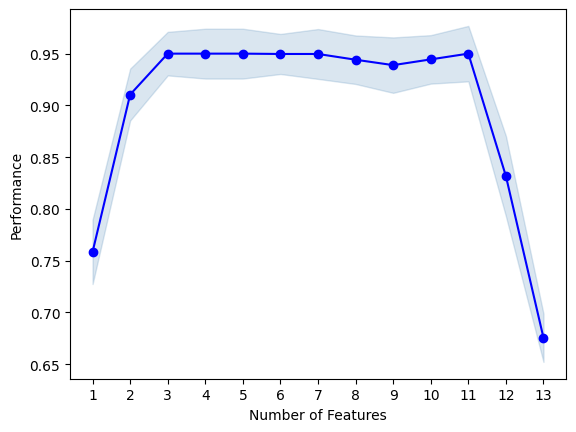

In [5]:
X, y = wine_data()

# use the KNN classification algorithm with default parameters
knn = KNeighborsClassifier()
# run sequential forward selection (SFS) method to extract the smallest number of features (trying from 3 to 13 features) that maximizes the accuracy
# use parameter forward as True, floating as False, verbose = 0, accuracy as the socring method and 10-fold cross validation
sfs = SFS(
    knn,
    k_features=(3, 13),
    forward=True,
    floating=False,
    verbose=0,
    scoring='accuracy',
    cv=10,
    n_jobs=-1,
)
# train the SFS method
sfs = sfs.fit(X, y)
plot_sfs(sfs.get_metric_dict(), kind='std_err');
print('best combination (ACC: %.3f): %s\n' % (sfs.k_score_, sfs.k_feature_idx_))

In [6]:
# create a dataframe with the proposed number of (important) features 
X_selected = pd.DataFrame()
X_selected["alcohol"] = X[:,0]
X_selected["ash"] = X[:,6]
X_selected["proanthocyanins"] = X[:,9]
# print statistical information of the dataframe
X_selected.describe()

,alcohol,ash,proanthocyanins
count,178.000000,178.000000,178.000000
mean,13.000618,2.029270,5.058090
std,0.811827,0.998859,2.318286
min,11.030000,0.340000,1.280000
25%,12.362500,1.205000,3.220000
50%,13.050000,2.135000,4.690000
75%,13.677500,2.875000,6.200000
max,14.830000,5.080000,13.000000


#### Feature scaling

From the statistical properties of the selected features, we argue that they spread in relatively different range. Inevitably, scaling seems to be an important prep-processing step.

According to [1], it can be concluded that standardization before clustering algorithm leads to obtain a better quality, efficient and accurate cluster result. It is also important to select a
specific standardization procedure, according to the nature of the datasets for the analysis. In this analysis [1], the Z-score (standardization of features by removing the mean and scaling to unit variance) was proposed as the most powerful method that will give more accurate and efficient results. Below, we also use the Z-score (StandardScaler) to scale the feature set.

[1] I. Mohamad, D. Usman, "Standardization and Its Effects on K-Means Clustering Algorithm", Research Journal of Applied Sciences, Engineering and Technology 6(17): 3299-3303, 2013.

In [7]:
# use the standard scaler with default parameters to scale the selected features
X_scaled = StandardScaler().fit_transform(X_selected)

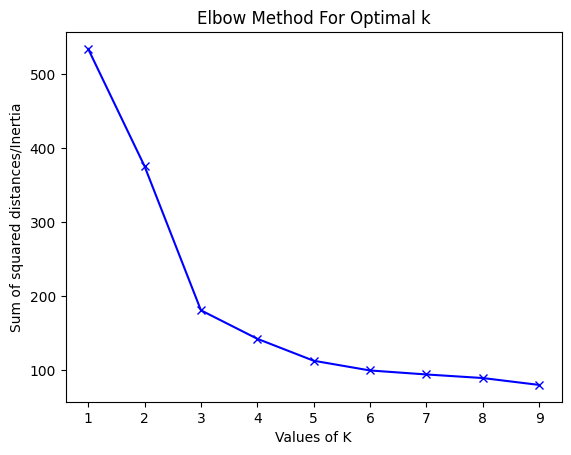

In [8]:
# run the elbow method with the scaled dataframe
elbow_method(X_scaled)

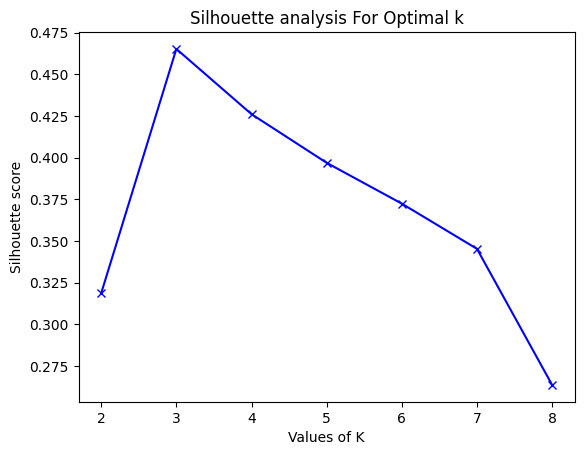

In [9]:
# Note: This diagram changes if we don't provide a seed within the silhouette function
silhouette(X_scaled)

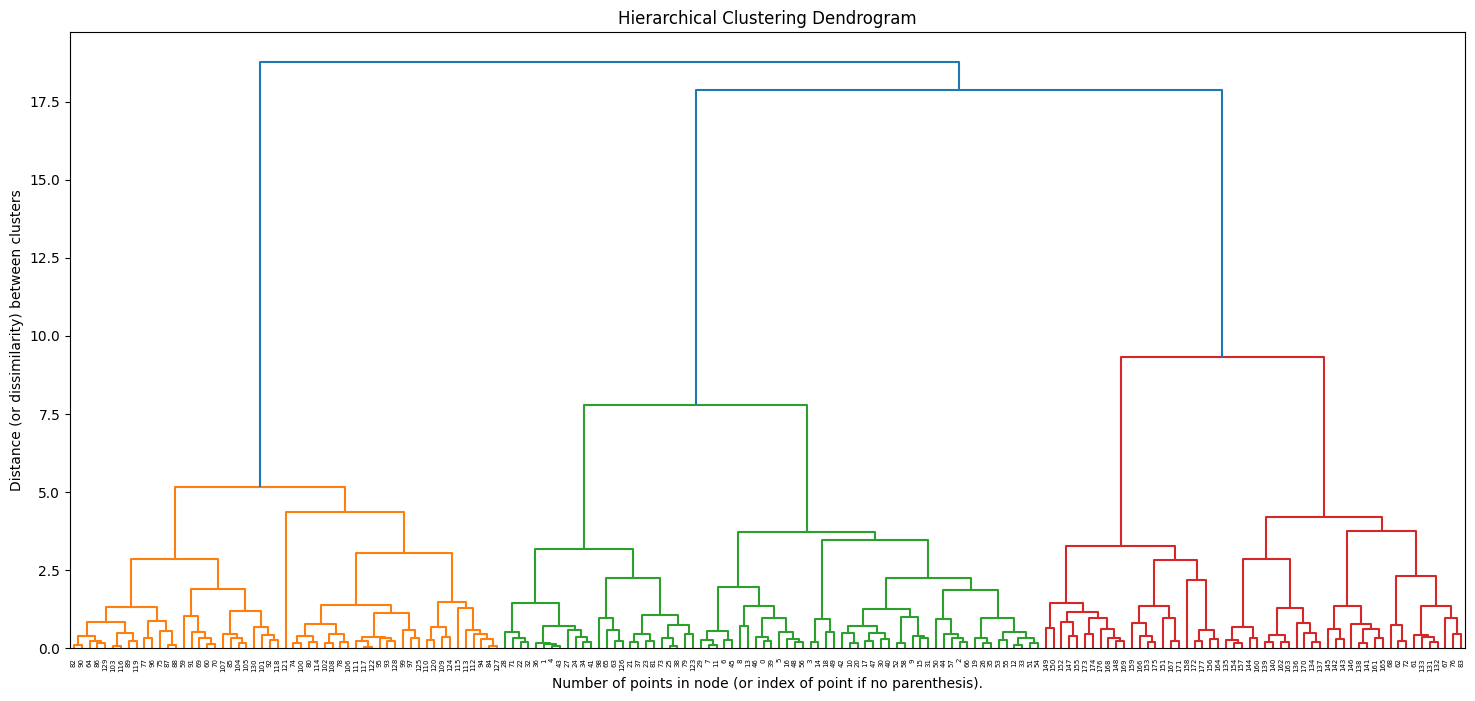

In [10]:
# run the hierarchical clustering function with the scaled dataframe
hierarchical_clustering(X_scaled)

### Cluster Visualization 

Based on the the number of clusters evaluated from the above analysis, we use K-Means to cluster the 178 wine observations.

In [11]:
# Use KMeans algorithm and set the n_clusters parameter to be equal to the best K obtained from the analysis above
kmeans_model = KMeans(n_clusters=3) # From elblow and especially silhouette plots we see best k is 3
# fit scaled dataset to separate the 178 observations into the selected number of clusters 
kmeans_model = kmeans_model.fit(X_scaled, y)

In [12]:
# create a dataframe containing the scaled data as well as the labels assigned to each wine
clusters = pd.DataFrame(X_scaled, columns = ["alcohol", "ash", "proanthocyanins"])
clusters['label']=kmeans_model.labels_
# print the first 5 lines of the dataframe
clusters.head()

,alcohol,ash,proanthocyanins,label
0,1.518613,1.034819,0.251717,2
1,0.246290,0.733629,-0.293321,2
2,0.196879,1.215533,0.269020,2
3,1.691550,1.466525,1.186068,2
4,0.295700,0.663351,-0.319276,2


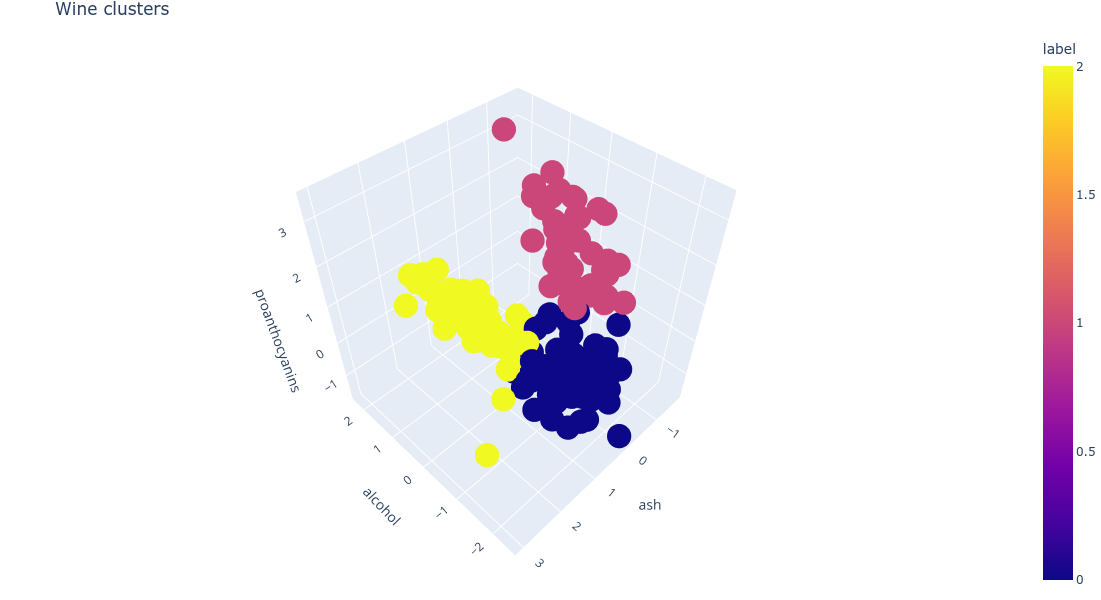

In [13]:
# print each wine as a point in the 3D space
fig = px.scatter_3d(clusters, x="alcohol", y="ash", z="proanthocyanins", color='label')

fig.update_layout(
    title='Wine clusters',
    width=600, height=600,
    margin=dict(t=30, r=0, l=20, b=10)
)

camera = dict(
    eye=dict(x=-1.25, y=1.25, z=1.75)
)

fig.update_layout(scene_camera=camera)
fig.show()